In [2]:
%cd C:\Users\JakeC\OneDrive\Documents\GitHub\ComputerVision\stereo project

C:\Users\JakeC\OneDrive\Documents\GitHub\ComputerVision\stereo project


In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

In [74]:
DEVICE_NAME = 'webcam_A_480p'
DATA_DIR = '.\\data'
IMAGE_DIR = os.path.join(DATA_DIR, 'test images')
INTRINSIC_MATRIX_DIR = os.path.join(DATA_DIR, 'intrinsic matricies')

IMAGE_NAME = DEVICE_NAME + '_sample_0.png'
POINTS_NAME = DEVICE_NAME + '_points_0.csv'
INTRINSIC_MATRIX_NAME = 'intrinsic matrix.csv'

paths = {
'IMAGE_PATH': os.path.join(IMAGE_DIR, IMAGE_NAME),
'POINTS_PATH': os.path.join(IMAGE_DIR, POINTS_NAME),
'INTRINSIC_MATRIX_PATH': os.path.join(INTRINSIC_MATRIX_DIR, DEVICE_NAME, INTRINSIC_MATRIX_NAME)
}

CIRCLE_RADIUS = 2
CIRCLE_THICKNESS = 2 
COLOR_MAPPING = {114:(0,0,255), 103:(0,255,0), 98:(255,0,0), 111:(0,128,255), 109:(255,0,255), 99:(255,255,0), 121:(0,255,255), 66:(0,0,0)}

CAMERA_RESOLUTION = (640,480)

In [5]:
def plotPoints(img:np.array, points:np.array):

    for point in points:
        img = cv.circle(img, (int(point[2]),int(point[3])), CIRCLE_RADIUS, COLOR_MAPPING[point[1]], CIRCLE_THICKNESS)
    # cv.imshow('img', img)
    # cv.waitKey(0)
    return img

In [75]:
image = cv.imread(paths['IMAGE_PATH'])
points = np.loadtxt(paths['POINTS_PATH'])
intrinsicMatrix = np.loadtxt(paths['INTRINSIC_MATRIX_PATH'])

displayImg = plotPoints(image, points)

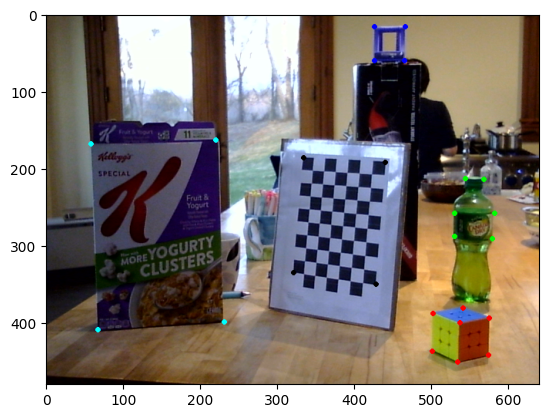

In [76]:
fig = plt.figure()
# ax = plt.axes(projection ='3d')
plt.imshow(cv.cvtColor(displayImg, cv.COLOR_BGR2RGB))
plt.show()

In [20]:
# np.squeeze(np.zeros((2, 10, 3)))
# np.zeros((2, 10, 3))
points[0]
# u = np.expand_dims(points[0], axis = 0)
# for i, point in enumerate(u):
#     print(i, point)
#     # for j, p in enumerate(point):
#     #     print(j, p)

array([ 0., 66.,  1.,  1.])

In [53]:
def convertToHomogenous(u:np.array, min:int = 0, max:int = 2, numPoints:int = 11, resolution:tuple = CAMERA_RESOLUTION):
    
    if len(u.shape) == 1:
        u = np.expand_dims(u, axis = 0)

    U = np.zeros((u.shape[0], numPoints, 3))
    for u_idx, point in enumerate(u):
        for point_idx in range(numPoints):
            w = point_idx * (max - min) / (numPoints - 1) 
            U[u_idx][point_idx][0] = (point[2]) * w
            U[u_idx][point_idx][1] = (point[3]) * w * -1
            # U[u_idx][point_idx][0] = (point[2] - (resolution[0] // 2)) * w
            # U[u_idx][point_idx][1] = (point[3] - (resolution[1] // 2)) * w * -1
            U[u_idx][point_idx][2] = w
    
    
    return U #np.squeeze(U)

In [ ]:
print(points[0], convertToHomogenous(points[0])) 

In [82]:
def convertPixel2CameraCoords(u:np.array, 
                              M_int:np.array,
                              M_ext:np.array,
                            #   displayImg:np.array,
                              min:int = 0, 
                              max:int = 1, 
                              numPoints:int = 11, 
                              resolution:tuple = CAMERA_RESOLUTION,
                              ):
    if len(u.shape) == 1:
        u = np.expand_dims(u, axis = 0)

    u_w = np.linspace(min, max, numPoints)
    inv_M_int = np.linalg.inv(M_int)

    R = M_ext[0:3,0:3]
    t = M_ext[0:3,3:4]

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DO EXTRINSIC!!!
    
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    U = np.zeros((u.shape[0], numPoints, 3))
    for u_idx, point in enumerate(u):
        # u_u = (point[2] - (resolution[0] // 2)) * u_w
        # u_v = (point[3] - (resolution[1] // 2)) * u_w
        u_u = (point[2]) * u_w
        u_v = (point[3]) * u_w
        [x,y,z] = np.matmul(inv_M_int, [u_u,u_v,u_w])
        print(x,y,z)


        ax.plot3D(x, y, z)
        # for point_idx in range(numPoints):
        #     w = point_idx * (max - min) / (numPoints - 1) 
        #     U[u_idx][point_idx][0] = (point[2] - (resolution[0] // 2)) * w
        #     U[u_idx][point_idx][1] = (point[3] - (resolution[1] // 2)) * w * -1
        #     U[u_idx][point_idx][2] = w
    # ax.imshow(displayImg,)
    plt.show()
    

In [ ]:
convertPixel2CameraCoords(points, M_int=intrinsicMatrix, min = 0, max= 10, numPoints=10)

In [105]:
u = points
M_int = intrinsicMatrix
min = 0
max = 2 
numPoints = 11
resolution = CAMERA_RESOLUTION

if len(u.shape) == 1:
    u = np.expand_dims(u, axis = 0)

u_w = np.linspace(min, max, numPoints)
inv_M_int = np.linalg.inv(M_int)


In [ ]:
u_w

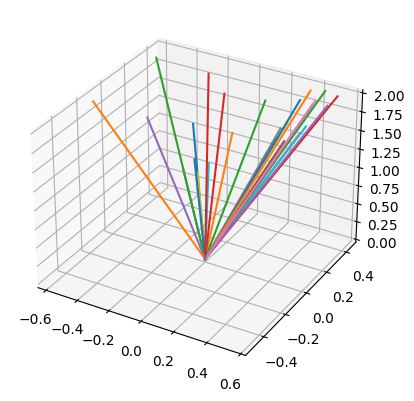

In [106]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
U = np.zeros((u.shape[0], numPoints, 3))
for u_idx, point in enumerate(u):
    # u_u = (point[2] - (resolution[0] // 2)) * u_w
    # u_v = (point[3] - (resolution[1] // 2)) * u_w
    u_u = (point[2]) * u_w
    u_v = (point[3]) * u_w
    [x,y,z] = np.matmul(inv_M_int, [u_u,u_v,u_w])


    ax.plot3D(x, y, z)
    # for point_idx in range(numPoints):
    #     w = point_idx * (max - min) / (numPoints - 1) 
    #     U[u_idx][point_idx][0] = (point[2] - (resolution[0] // 2)) * w
    #     U[u_idx][point_idx][1] = (point[3] - (resolution[1] // 2)) * w * -1
    #     U[u_idx][point_idx][2] = w
plt.show()

In [97]:
temp = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
r_temp = temp[0:3,0:3]
t_temp = temp[0:3,3:4]
print(temp)
print(r_temp)
print(t_temp)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]
[[ 4]
 [ 8]
 [12]]


In [125]:
import math

def generateRotationMatrix(alpha:float = 0,beta:float = 0,gamma:float = 0, mode:str = 'zyx'):
    '''
    alpha: rotation about z (yaw)
    beta: rotation about y (pitch)
    gamma: rotation about x (roll)
    '''
    R = np.zeros((3,3))
    if mode == 'zyx':

        R[0][0] = math.cos(alpha) * math.cos(beta)
        R[0][1] = math.sin(alpha) * math.sin(beta) * math.cos(gamma) - math.sin(alpha) * math.cos(gamma)
        R[0][2] = math.cos(alpha) * math.sin(beta) * math.cos(gamma) + math.sin(alpha) * math.sin(gamma)

        R[1][0] = math.sin(alpha) * math.cos(beta)
        R[1][1] = math.sin(alpha) * math.sin(beta) * math.sin(gamma) + math.cos(alpha) * math.cos(gamma)
        R[1][2] = math.sin(alpha) * math.sin(beta) * math.cos(gamma) - math.cos(alpha) * math.sin(gamma)

        R[2][0] = -1 * math.sin(beta)
        R[2][1] = math.cos(beta) * math.sin(gamma)
        R[2][2] = math.cos(beta) * math.cos(gamma)
    else:
        R[0][0] = math.cos(beta) * math.cos(gamma)
        R[0][1] = math.sin(alpha) * math.sin(beta) * math.cos(gamma) - math.cos(alpha) * math.sin(gamma)
        R[0][2] = math.cos(alpha) * math.sin(beta) * math.cos(gamma) + math.sin(alpha) * math.sin(gamma)

        R[1][0] = math.cos(beta) * math.sin(gamma)
        R[1][1] = math.sin(alpha) * math.sin(beta) * math.sin(gamma) + math.cos(alpha) * math.cos(gamma)
        R[1][2] = math.cos(alpha) * math.sin(beta) * math.sin(gamma) - math.sin(alpha) * math.cos(gamma)

        R[2][0] = -1 * math.sin(beta)
        R[2][1] = math.sin(alpha) * math.cos(beta)
        R[2][2] = math.cos(alpha) * math.cos(beta)

    return np.round(R,3)

In [153]:
def getAngle2Line(vector0:np.array = np.array([1,0,0]),
                  vector1:np.array = np.array([0,0,1]),
                  origin:np.array = np.array([0,0,0]), 
                  mode:str = 'd'
                  ):
    dotProduct = np.matmul(vector0 - origin, vector1 - origin)
    magnitude0 = np.linalg.norm(vector0 - origin)
    magnitude1 = np.linalg.norm(vector1 - origin)
    if magnitude0 * magnitude1 == 0:
        return False
    # print(dotProduct)
    # print(magnitude0, magnitude1)
    ret = math.acos(dotProduct/(magnitude0 * magnitude1))
    if mode == 'd':
        ret = ret * 180 / math.pi
    return (ret)


def getAngle2Plane(vector:np.array = np.array([1,0,0]), 
                   origin:np.array = np.array([0,0,0]),
                   planeNormal:np.array = np.array([0,0,1]), 
                   ):
    #Unecessary and possibly disfunctional  
    dotProduct = np.matmul(vector - origin, planeNormal - origin)
    magnitude0 = np.linalg.norm(vector - origin)
    magnitude1 = np.linalg.norm(planeNormal - origin)
    print(dotProduct)
    print(magnitude0, magnitude1)
    return ((math.acos(dotProduct/(magnitude0 * magnitude1))) * 180 / math.pi - 90)

def getRotationMatrix(vector:np.array = np.array([1,0,0]), 
                      destinationDirection:np.array = np.array([1,0,0]),
                      origin:np.array = np.array([0,0,0]),                      
                      ):
    alpha = getAngle2Line(vector0= np.array([vector[0], vector[1], 0]),
                           vector1= np.array([destinationDirection[0], destinationDirection[1], 0]), 
                           origin=np.array([origin[0], origin[1], 0]))
    beta = getAngle2Line(vector0= np.array([vector[0], 0, vector[2]]),
                           vector1= np.array([destinationDirection[0], 0, destinationDirection[2]]), 
                           origin=np.array([origin[0], 0, origin[2]]))
    gamma = getAngle2Line(vector0= np.array([0, vector[1], vector[2]]),
                           vector1= np.array([0, destinationDirection[1], destinationDirection[2]]), 
                           origin=np.array([0, origin[1], origin[2]]))
    
    print(alpha, beta, gamma)

In [209]:
def getRotationMatrix(vector:np.array = np.array([1,0,0]), 
                      destination:np.array = np.array([1,0,0]),
                      origin:np.array = np.array([0,0,0]),                      
                      ):
    # alpha = getAngle2Line(vector0= np.array([vector[0], vector[1], 0]),
    #                        vector1= np.array([destinationDirection[0], destinationDirection[1], 0]), 
    #                        origin=np.array([origin[0], origin[1], 0]))
    # beta = getAngle2Line(vector0= np.array([vector[0], 0, 0]),
    #                        vector1= np.array([destinationDirection[0], 0, 0]), 
    #                        origin=np.array([origin[0], 0, 0]))
    # gamma = getAngle2Line(vector0= np.array([0, vector[1], vector[2]]),
    #                        vector1= np.array([0, destinationDirection[1], destinationDirection[2]]), 
    #                        origin=np.array([0, origin[1], origin[2]]))
    vector -= origin
    destination -= origin

    
    if vector[0] == 0:
        if vector[1] >= 0:
            alphaVectorAngle = math.pi / 2
        else:
            alphaVectorAngle = -1 * math.pi / 2
    elif vector[0] > 0:
        alphaVectorAngle = math.atan(vector[1] / vector[0])
    else:
        alphaVectorAngle = math.atan(vector[1] / vector[0]) + math.pi

    if destination[0] == 0:
        if destination[1] >= 0:
            alphaDestinationAngle = math.pi / 2
        else:
            alphaDestinationAngle = -1 * math.pi / 2
    if destination[0] > 0:
        alphaDestinationAngle = math.atan(destination[1] / destination[0])
    else:
        alphaDestinationAngle = math.atan(destination[1] / destination[0])  + math.pi
    
    alpha = (alphaDestinationAngle - alphaVectorAngle)
    

    if vector[2] == 0:
        if vector[0] >= 0:
            betaVectorAngle = math.pi / 2
        else:
            betaVectorAngle = -1 * math.pi / 2
    elif vector[2] > 0:
        betaVectorAngle = math.atan(vector[0] / vector[2])
    else:
        betaVectorAngle = math.atan(vector[0] / vector[2]) + (math.pi / 2)

    if destination[2] == 0:
        if destination[0] >= 0:
            betaDestinationAngle = math.pi / 2
        else:
            betaDestinationAngle = -1 * math.pi / 2
    elif destination[2] > 0:
        betaDestinationAngle = math.atan(destination[0] / destination[2])
    else:
        betaDestinationAngle = math.atan(destination[0] / destination[2])  + (math.pi / 2)
    
    beta = (betaDestinationAngle - betaVectorAngle)

    
    print(alpha, beta)
    return (generateRotationMatrix(alpha=alpha, beta=beta))

In [221]:

v = np.array([1,2,0])
d = np.array([1,2,5])
M = getRotationMatrix(vector = v,
                  destination= d)
ans = np.matmul(M,v)
print(ans)
print(np.linalg.norm(ans), np.linalg.norm(v))

#Doesnt work with multiple transforms (one is good)
#Possible issues: need to adjust between calculating alpha and beta
# or Need to look at how M is calculated
#~~ Try to do twice, one for each M

0.0 -1.3734007669450157
[0.196 2.    0.981]
2.2362417132322703 2.23606797749979


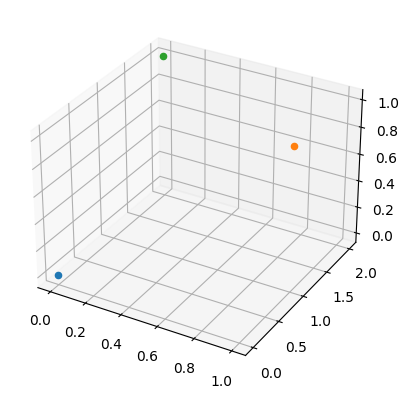

In [160]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(0,0,0)
ax.scatter(1, 1, 1)
ax.scatter(0, 2, 1)
plt.show()

In [128]:
np.matmul(generateRotationMatrix(gamma = math.pi/2), [[1],[2],[3]])
# print(generateRotationMatrix(yaw= math.pi/2))

array([[ 1.],
       [-3.],
       [ 2.]])